In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_csv('car data.csv')
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
cat_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
for i in cat_columns:
    print(df1[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [9]:
df1.shape

(301, 9)

In [10]:
df2 = df1.copy()
df2['no_of_years'] = 2021 - df2['Year']
df2.drop(['Year'], axis=1, inplace=True)
df2.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [11]:
df2.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000


In [12]:
df2.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'no_of_years'],
      dtype='object')

In [13]:
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'no_of_years']

In [14]:
df3 = df2[columns]
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
df3 = pd.get_dummies(df3, drop_first=True)
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [16]:
df3.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


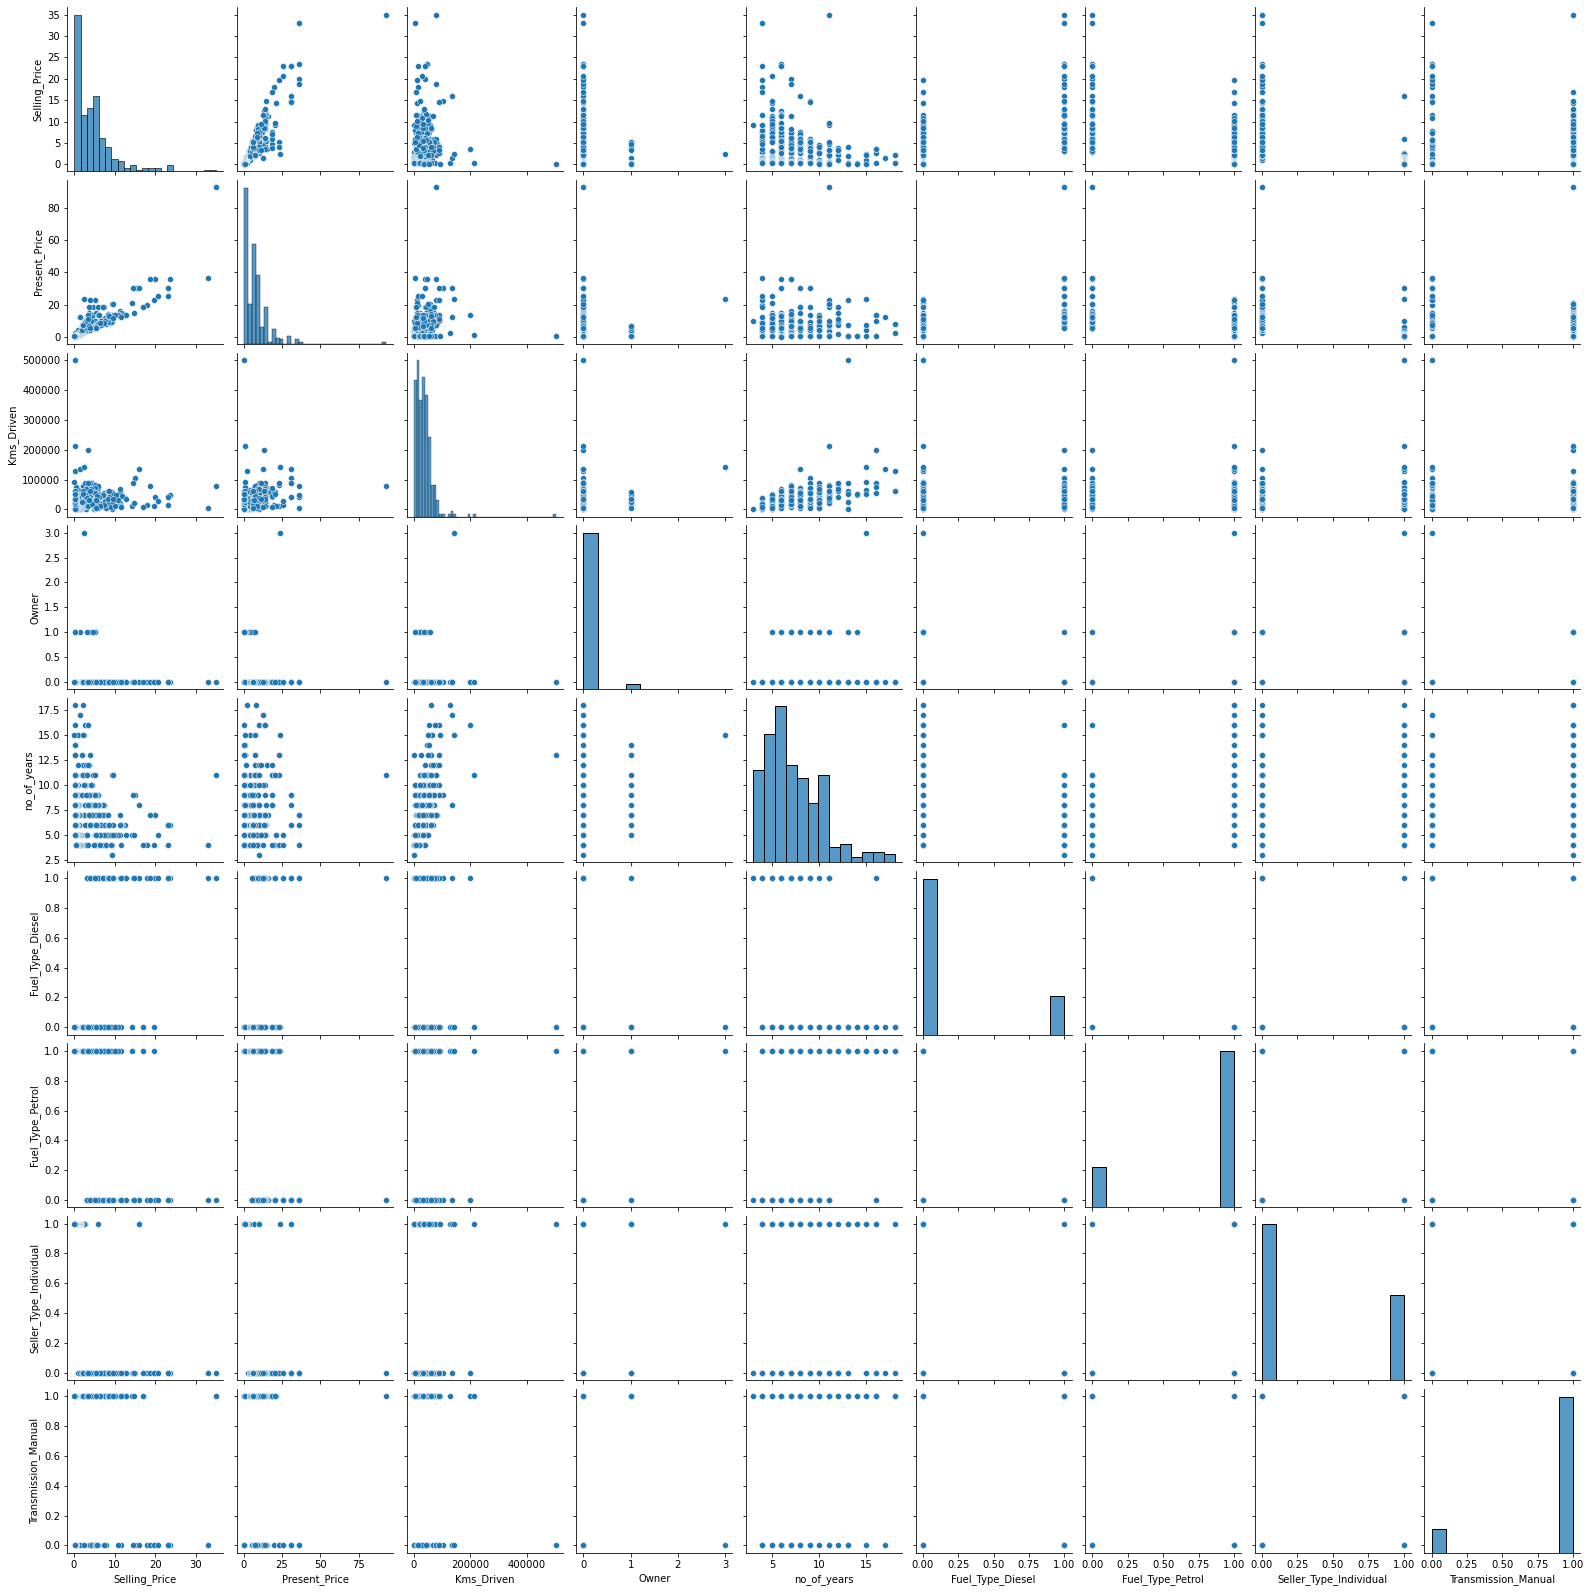

In [17]:
sns.pairplot(df3)

<AxesSubplot:>

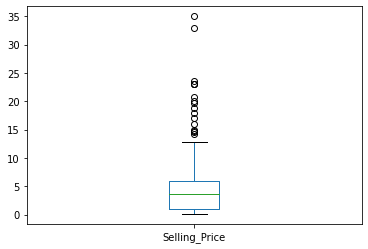

In [18]:
df3.Selling_Price.plot(kind='box')

In [19]:
X = df3.iloc[:, 1:]
y = df3.iloc[:, 0]

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
model.feature_importances_

array([0.40420837, 0.04194798, 0.0008167 , 0.07908375, 0.20977546,
       0.01453953, 0.12521086, 0.12441734])

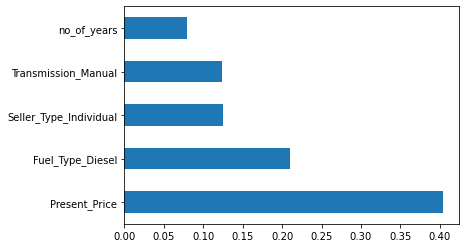

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [24]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
from sklearn.model_selection import KFold
cv = KFold(5)

In [26]:
random_grid = {'n_estimators': [ int(x) for x in np.linspace(0, 1500, 15)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'criterion' : ['mse', 'mae'],
               'max_depth': [int(x) for x in np.linspace(5, 50, 10)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
ran = RandomizedSearchCV(rfr, random_grid, cv = cv, n_jobs=1,scoring='neg_mean_squared_error', n_iter = 10, verbose=2)

In [28]:
ran.fit(X_train, y_train)

qrt, max_depth=15, criterion=mse 
[CV]  n_estimators=0, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=15, criterion=mse, total=   0.0s
[CV] n_estimators=0, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=15, criterion=mse 
[CV]  n_estimators=0, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=15, criterion=mse, total=   0.0s
[CV] n_estimators=107, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5, criterion=mse 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_p

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [0, 107, 214, 321, 428,
                                                         535, 642, 750, 857,
                                                         964, 1071, 1178, 1285,
                                                 

In [29]:
ran.best_params_

{'n_estimators': 1071,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25,
 'criterion': 'mse'}

In [30]:
ran.best_score_

-3.2472581534031972

In [31]:
ran.best_estimator_

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=15,
                      n_estimators=1071)

In [32]:
model = RandomForestRegressor(criterion='mae', max_depth=5, min_samples_split=5,
                      n_estimators=750)

In [33]:
model.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=5, min_samples_split=5,
                      n_estimators=750)

In [34]:
model.score(X_test, y_test)

0.9278478669673684

In [35]:
model.score(X_train, y_train)

0.9608217009653519

In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

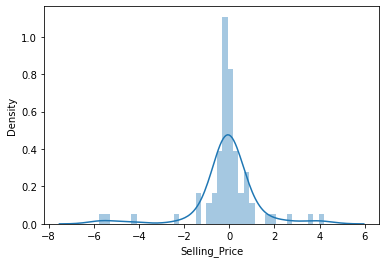

In [38]:
sns.distplot(y_test-predictions) # getting a close distribution graph indicates that the errros are very minimal

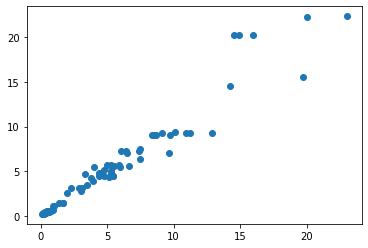

In [39]:
plt.scatter(y_test, predictions)

In [40]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('r2:', r2_score(y_test, predictions))

MAE: 0.7290663157894722
MSE: 1.9161796983953252
r2: 0.9278478669673684


In [41]:
import pickle

file = open('rfr_modell.pkl', 'wb')
pickle.dump(model, file)

In [42]:
import joblib

filename = 'rfr_model.sav'
joblib.dump(model, filename)

['rfr_model.sav']